In [120]:
%matplotlib inline

In [156]:
import xarray as xr

# %%
import pathlib
import numpy as np
import pandas as pd

# %%
import matplotlib.pyplot as plt

# %%
model = 'JMA'

In [157]:
# %%
HOME = pathlib.Path.home()

In [158]:
var_name = 'SST'

In [159]:
dpath = HOME / 'research' / 'Smart_Ideas' / 'data' / 'GCMs' / 'NC' / model / var_name

# %%
lfiles = list(dpath.glob("*_seasonal.nc"))

# %%
lfiles.sort()

In [160]:
lfiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1979_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1980_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1981_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1982_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1983_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1984_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1985_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1986_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1987_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/S

In [161]:
np.unique(dset.time.dt.year)[0]

2016

In [162]:
d = {}
for f in lfiles: 
    dset = xr.open_dataset(f)
    d[np.unique(dset.time.dt.year)[0]] = [len(dset.time.dt.month), dset.time.dt.month.data]
    print(f"year {np.unique(dset.time.dt.year)[0]}: {len(dset.time.dt.month)} months present")
    

year 1979: 12 months present
year 1980: 12 months present
year 1981: 12 months present
year 1982: 12 months present
year 1983: 12 months present
year 1984: 12 months present
year 1985: 12 months present
year 1986: 12 months present
year 1987: 12 months present
year 1988: 12 months present
year 1989: 12 months present
year 1990: 12 months present
year 1991: 12 months present
year 1992: 12 months present
year 1993: 12 months present
year 1994: 12 months present
year 1995: 12 months present
year 1996: 12 months present
year 1997: 12 months present
year 1998: 12 months present
year 1999: 12 months present
year 2000: 12 months present
year 2001: 12 months present
year 2002: 12 months present
year 2003: 12 months present
year 2004: 12 months present
year 2005: 12 months present
year 2006: 12 months present
year 2007: 12 months present
year 2008: 12 months present
year 2009: 12 months present
year 2010: 12 months present
year 2011: 12 months present
year 2012: 12 months present
year 2013: 12 

In [118]:
dset = xr.open_dataset(lfiles[1])

In [119]:
dset.time.dt.month.data

array([ 1,  2,  5,  6,  7,  8,  9, 10, 11, 12])

In [88]:
# %%
print(f"opening the multiple files dataset for {model}, {var_name}")

# %%
dset = xr.open_mfdataset(lfiles, parallel=True, combine='nested', concat_dim='time')

# %%
dset_rechunk = dset.chunk({'time': -1, 'lat': 1, 'lon':4})

opening the multiple files dataset for UKMO, SST


In [89]:
dset_rechunk

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, member: 28, step: 3, time: 233)
Coordinates:
    surface  int64 0
  * member   (member) int64 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * step     (step) int64 3 4 5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1993-02-01 1993-05-01 ... 2016-12-01
Data variables:
    sst      (time, step, member, lat, lon) float32 dask.array<chunksize=(233, 3, 28, 1, 4), meta=np.ndarray>
Attributes:
    history:  Mon Nov 25 14:39:35 2019: ncrename -d longitude,lon -d latitude...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [37]:
clim = dset_rechunk.groupby('time.month').mean('time')

In [38]:
clim

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, member: 30, month: 12, step: 3)
Coordinates:
    surface  int64 0
  * member   (member) int64 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * step     (step) int64 3 4 5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, step, member, lat, lon) float32 dask.array<chunksize=(1, 3, 30, 1, 4), meta=np.ndarray>

In [39]:
clim = clim.mean('member')

In [40]:
opath = dpath / 'CLIMATOLOGY'

# %%
if not opath.exists():
    opath.mkdir()

#%%
year_start = dset.time.to_index()[0].year
year_end = dset.time.to_index()[-1].year

#%%
print(f"saving {str(opath)}/CLIMATOLOGY_{model}_{var_name}_{year_start}_{year_end}.nc")

saving /home/nicolasf/research/Smart_Ideas/data/GCMs/NC/DWD/SST/CLIMATOLOGY/CLIMATOLOGY_DWD_SST_1993_2016.nc


In [ ]:
clim.to_netcdf(opath / f"CLIMATOLOGY_{model}_{var_name}_{year_start}_{year_end}.nc")

#%%
print("\ndone ...")

In [41]:
clim

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12, step: 3)
Coordinates:
    surface  int64 0
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * step     (step) int64 3 4 5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, step, lat, lon) float32 dask.array<chunksize=(1, 3, 1, 4), meta=np.ndarray>

In [42]:
clim.load()

/home/nicolasf/anaconda3/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12, step: 3)
Coordinates:
    surface  int64 0
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * step     (step) int64 3 4 5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, step, lat, lon) float32 nan nan nan ... 271.24954 271.24954

In [57]:
clim.to_netcdf(opath / f"CLIMATOLOGY_{model}_{var_name}_{year_start}_{year_end}.nc", )

In [51]:
clim.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
    surface  int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [53]:
clim['month'] = (('month'), list(range(1, 13)))

In [54]:
clim

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12, step: 3)
Coordinates:
    surface  int64 0
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * step     (step) int64 3 4 5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, step, lat, lon) float32 nan nan nan ... 271.24954 271.24954

In [55]:
clim.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
    surface  int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [76]:
var_name = 'Z850'

In [77]:
opath

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/DWD/SST/CLIMATOLOGY')

In [78]:
opath = HOME / 'research' / 'Smart_Ideas' / 'data' / 'GCMs' / 'NC' / model / var_name / 'CLIMATOLOGY'

In [79]:
dset = xr.open_dataset(opath / f"CLIMATOLOGY_{model}_{var_name}_{year_start}_{year_end}.nc")

In [80]:
dset.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:        (lat: 180, lon: 360, month: 12, step: 3)
Coordinates:
    isobaricInhPa  int64 ...
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * step           (step) int64 3 4 5
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month          (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    z850           (month, step, lat, lon) float32 ...>

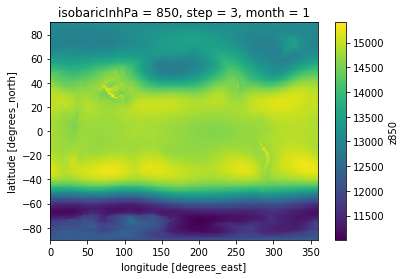

In [82]:
dset['z850'][0,0,:,:].plot()

In [163]:
dset.close()